

# Bank Marketing

Dataset used in this problem 

* Bank marketing -https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

* The data is related with direct marketing campaigns of a Portuguese banking institution. 
* The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required
* The classification goal is to predict if the client will subscribe a term deposit (variable y).

* This can be considered as a binary classification problem.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data visualization
import matplotlib.pyplot as plt
from matplotlib import cm # Colomaps
import seaborn as sns

# Classifier algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#train test split
from sklearn.model_selection import train_test_split

# Model evaluation
from sklearn import metrics

# 1. Load Data


## Mount Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read CSV file from a given path


In [2]:
file_path_gd = 'https://raw.githubusercontent.com/ajithdolamulla/Capstone-Project/main/bank-full.csv'

# Load CSV File
data = pd.read_csv(file_path_gd,sep=';' )
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


# 2. Inspecting Loaded Dataset


In [4]:
data.shape

(45211, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
data['y'].unique()

array(['no', 'yes'], dtype=object)

In [8]:
data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [9]:
data['job'].nunique()

12

In [10]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [12]:
data['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [14]:
data[['y','default']].value_counts()

y    default
no   no         39159
yes  no          5237
no   yes          763
yes  yes           52
dtype: int64

In [ ]:
data.loc[data['y'].isna()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [ ]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211.0,NaN,NaN,NaN,40.93621,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211.0,NaN,NaN,NaN,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211.0,NaN,NaN,NaN,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


# 3. Pre-Process Data for Training


## Transform into Binary Column
* y - has the client subscribed a term deposit? (binary: "yes","no")
* if "yes" = 1 
* if "No"  = 0

In [23]:
data['y_act']=np.where(data['y'] == 'no',0,1)

In [24]:
data[['y','y_act']].sample(6)

,y,y_act
4952,no,0
19181,no,0
27533,no,0
9123,yes,1
5241,no,0
15363,no,0


In [ ]:
# value counts
data[['y','y_act']].value_counts()

y    y_act
no   0        39922
yes  1         5289
dtype: int64

In [25]:
# value counts as a ratio
data[['y','y_act']].value_counts(normalize=True)

y    y_act
no   0        0.883015
yes  1        0.116985
dtype: float64

## Create ID Column

In [29]:
data['id'] = data.index+1
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,has_loan,y_act,id
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0,0,2
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1,0,3
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,0,4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,0,1,45207
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,0,1,45208
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,0,1,45209
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,0,0,45210


## Rearranging Columns


In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'y_act', 'id'],
      dtype='object')

In [ ]:
data=data[['id','age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'y_act']]
data.head(2)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_act
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0


In [ ]:
data.select_dtypes(include=['int'])

,id,age,balance,day,duration,campaign,pdays,previous,y_act
0,1,58,2143,5,261,1,-1,0,0
1,2,44,29,5,151,1,-1,0,0
2,3,33,2,5,76,1,-1,0,0
3,4,47,1506,5,92,1,-1,0,0
4,5,33,1,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...
45206,45207,51,825,17,977,3,-1,0,1
45207,45208,71,1729,17,456,2,-1,0,1
45208,45209,72,5715,17,1127,5,184,3,1
45209,45210,57,668,17,508,4,-1,0,0


## Check the correlation of numerical columns


In [ ]:
correlation_matrix= data[['age', 'balance', 'day','duration', 'campaign', 'pdays','previous', 'y_act']].corr()
correlation_matrix

,age,balance,day,duration,campaign,pdays,previous,y_act
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
y_act,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


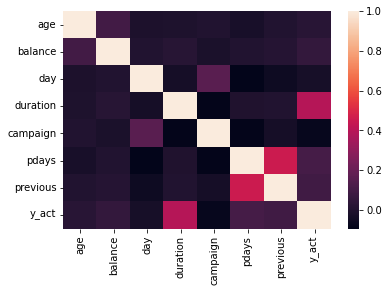

In [ ]:
sns.heatmap(correlation_matrix)

## Descriptive stats and identify Ranges



In [ ]:
data['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [ ]:
print(data['age'].describe())

IQR= data['age'].quantile(0.75)-data['age'].quantile(0.25)

upper_limit = data['age'].quantile(0.75) + 1.5*(IQR)
lower_limit = data['age'].quantile(0.25) - 1.5*(IQR)
print(f'temperature ={upper_limit}')
print(f'temperature ={lower_limit}')

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64
temperature =70.5
temperature =10.5


## Outlier treatment and Plot distributions


In [ ]:
data = data[(data['age'] > 10) & (data['age'] < 71)]

In [ ]:
data.shape

(44724, 19)

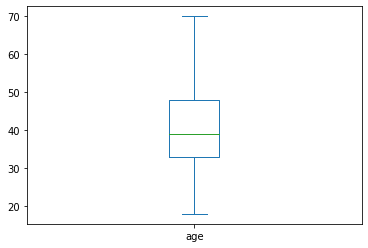

In [ ]:
data['age'].plot(kind='box')

In [ ]:
data.shape

(44724, 19)

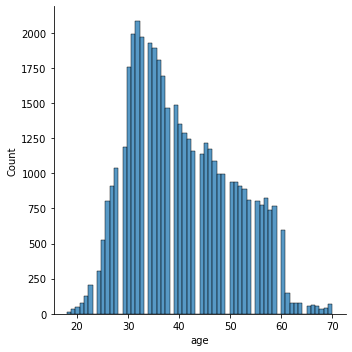

In [ ]:
sns.displot(kind='hist', x='age', data=data)

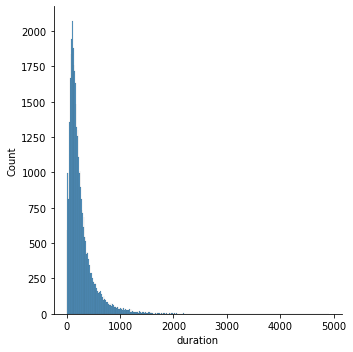

In [ ]:
sns.displot(kind='hist', x='duration', data=data)

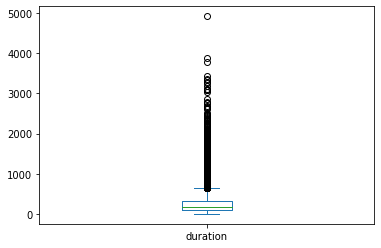

In [ ]:
data['duration'].plot(kind='box')

In [ ]:
data['duration'].describe().T

count    44724.000000
mean       257.369846
std        257.428953
min          0.000000
25%        103.000000
50%        179.000000
75%        318.000000
max       4918.000000
Name: duration, dtype: float64

In [ ]:
data.loc[(data['duration'] > 1500) & (data['y_act' ]== 1)]

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_act
446,447,39,technician,single,unknown,no,45248,yes,no,unknown,6,may,1623,1,-1,0,unknown,yes,1
474,475,34,admin.,married,secondary,no,869,no,no,unknown,6,may,1677,1,-1,0,unknown,yes,1
694,695,36,technician,married,secondary,no,368,yes,yes,unknown,6,may,1597,2,-1,0,unknown,yes,1
1087,1088,30,blue-collar,married,secondary,no,309,yes,no,unknown,7,may,1574,2,-1,0,unknown,yes,1
1124,1125,29,management,married,tertiary,no,199,yes,yes,unknown,7,may,1689,4,-1,0,unknown,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42378,42379,58,technician,married,secondary,no,3399,no,no,telephone,30,nov,1628,2,188,8,success,yes,1
42534,42535,68,retired,married,secondary,no,1443,no,no,telephone,21,dec,2062,2,257,1,success,yes,1
43032,43033,38,services,married,secondary,no,775,no,no,cellular,12,feb,1835,3,182,2,success,yes,1
43942,43943,30,services,divorced,secondary,no,436,yes,no,cellular,17,jun,1720,1,-1,0,unknown,yes,1


In [ ]:
data = data[(data['duration'] < 1500)]

In [ ]:
data.shape

(44498, 19)

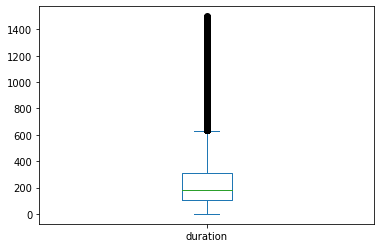

In [ ]:
data['duration'].plot(kind='box')

In [26]:
data['y_act'].value_counts()

0    39922
1     5289
Name: y_act, dtype: int64

In [27]:
correlation_matrix = data[['duration','y_act']].corr()
correlation_matrix

,duration,y_act
duration,1.000000,0.394521
y_act,0.394521,1.000000


## working on catagorical columns

In [17]:
# loan: has personal loan? (binary: "yes","no")
data['has_loan']=np.where(data['loan'] == 'no',0,1)

In [18]:
data[['loan','has_loan']].head()

,loan,has_loan
0,no,0
1,no,0
2,yes,1
3,no,0
4,no,0


In [30]:
response = data.groupby(by=['loan']).agg({'id' : 'count','y_act': 'sum'})
response

,id,y_act
loan,,
no,37967,4805
yes,7244,484


In [31]:
response = data.groupby(by=['default']).agg({'id' : 'count','y_act': 'sum'})
response

,id,y_act
default,,
no,44396,5237
yes,815,52


In [ ]:
correlation_matrix= data[['age', 'balance', 'day','duration', 'campaign', 'pdays','previous','has_loan','y_act']].corr()
correlation_matrix

,age,balance,day,duration,campaign,pdays,previous,has_loan,y_act
age,1.000000,0.086883,-0.007054,-0.022424,0.013197,-0.032865,-0.009281,0.000393,-0.012960
balance,0.086883,1.000000,0.005326,0.018333,-0.013113,0.000583,0.013786,-0.083863,0.046196
day,-0.007054,0.005326,1.000000,-0.031805,0.163436,-0.093831,-0.051876,0.011425,-0.030488
duration,-0.022424,0.018333,-0.031805,1.000000,-0.091798,0.001599,0.001063,-0.009830,0.401144
campaign,0.013197,-0.013113,0.163436,-0.091798,1.000000,-0.088420,-0.032357,0.009071,-0.071687
pdays,-0.032865,0.000583,-0.093831,0.001599,-0.088420,1.000000,0.454325,-0.021917,0.104953
previous,-0.009281,0.013786,-0.051876,0.001063,-0.032357,0.454325,1.000000,-0.009496,0.092384
has_loan,0.000393,-0.083863,0.011425,-0.009830,0.009071,-0.021917,-0.009496,1.000000,-0.065575
y_act,-0.012960,0.046196,-0.030488,0.401144,-0.071687,0.104953,0.092384,-0.065575,1.000000


In [ ]:
data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
data['job'].value_counts()

blue-collar      9686
management       9397
technician       7549
admin.           5149
services         4128
retired          1823
self-employed    1560
entrepreneur     1482
unemployed       1288
housemaid        1220
student           935
unknown           281
Name: job, dtype: int64

In [ ]:
response = data.groupby(by=['job']).agg({'id': 'count', 'y_act': 'sum'})
response['%'] = response['y_act']/response['id'] 
response.sort_values(by='%',ascending=False)

,id,y_act,%
job,,,
student,935,267,0.285561
retired,1823,315,0.172792
unemployed,1288,193,0.149845
management,9397,1269,0.135043
admin.,5149,614,0.119246
unknown,281,32,0.113879
self-employed,1560,173,0.110897
technician,7549,811,0.107431
services,4128,353,0.085514


In [ ]:
data['job_grp'] = data['job']

In [ ]:
data = data.join(pd.get_dummies(data['job_grp'], prefix='job_'))


In [ ]:
data.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y', 'y_act', 'has_loan', 'job_grp',
       'job__admin.', 'job__blue-collar', 'job__entrepreneur',
       'job__housemaid', 'job__management', 'job__retired',
       'job__self-employed', 'job__services', 'job__student',
       'job__technician', 'job__unemployed', 'job__unknown'],
      dtype='object')

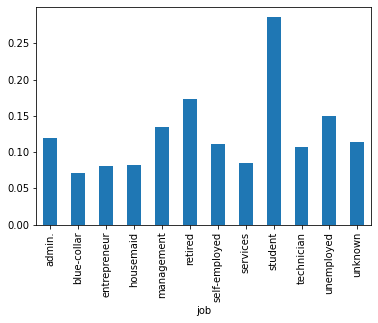

In [ ]:
response['%'].plot(kind='bar')

In [ ]:
correlation_matrix= data[['age', 'balance', 'day','duration', 'campaign', 'pdays','previous','has_loan','job__student','job__retired','job__blue-collar','job__entrepreneur','y_act']].corr()
correlation_matrix

,age,balance,day,duration,campaign,pdays,previous,has_loan,job__student,job__retired,job__blue-collar,job__entrepreneur,y_act
age,1.000000,0.086883,-0.007054,-0.022424,0.013197,-0.032865,-0.009281,0.000393,-0.205969,0.361474,-0.026768,0.030161,-0.012960
balance,0.086883,1.000000,0.005326,0.018333,-0.013113,0.000583,0.013786,-0.083863,0.002118,0.028050,-0.047403,0.010557,0.046196
day,-0.007054,0.005326,1.000000,-0.031805,0.163436,-0.093831,-0.051876,0.011425,-0.016609,-0.007147,-0.022938,-0.002764,-0.030488
duration,-0.022424,0.018333,-0.031805,1.000000,-0.091798,0.001599,0.001063,-0.009830,-0.004922,0.019181,0.014202,0.002313,0.401144
campaign,0.013197,-0.013113,0.163436,-0.091798,1.000000,-0.088420,-0.032357,0.009071,-0.022060,-0.024519,0.008025,0.001375,-0.071687
pdays,-0.032865,0.000583,-0.093831,0.001599,-0.088420,1.000000,0.454325,-0.021917,0.025103,-0.014925,0.020989,-0.014271,0.104953
previous,-0.009281,0.013786,-0.051876,0.001063,-0.032357,0.454325,1.000000,-0.009496,0.024348,-0.005761,-0.015577,-0.009268,0.092384
has_loan,0.000393,-0.083863,0.011425,-0.009830,0.009071,-0.021917,-0.009496,1.000000,-0.059335,0.003229,0.015800,0.039344,-0.065575
job__student,-0.205969,0.002118,-0.016609,-0.004922,-0.022060,0.025103,0.024348,-0.059335,1.000000,-0.030280,-0.077278,-0.027193,0.081522
job__retired,0.361474,0.028050,-0.007147,0.019181,-0.024519,-0.014925,-0.005761,0.003229,-0.030280,1.000000,-0.109022,-0.038363,0.040772


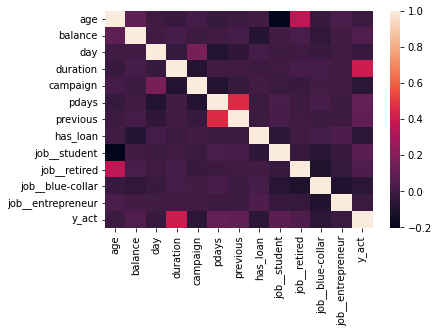

In [ ]:
sns.heatmap(correlation_matrix)

In [ ]:
data['marital'].value_counts()

married     26728
single      12703
divorced     5067
Name: marital, dtype: int64

In [ ]:
response = data.groupby(by=['marital']).agg({'id': 'count', 'y_act': 'sum'})
response

,id,y_act
marital,,
divorced,5067,549
married,26728,2525
single,12703,1859


In [ ]:
response['%'] = response['y_act']/response['id'] 
response

,id,y_act,%
marital,,,
divorced,5067,549,0.108348
married,26728,2525,0.094470
single,12703,1859,0.146343


In [ ]:
data['marital_grp'] = data['marital']

In [ ]:
data = data.join(pd.get_dummies(data['marital_grp'], prefix='marital_'))

In [ ]:
data.sample(1)

,id,age,job,marital,education,default,balance,housing,loan,contact,...,job__self-employed,job__services,job__student,job__technician,job__unemployed,job__unknown,marital_grp,marital__divorced,marital__married,marital__single
37304,37305,30,admin.,married,secondary,no,396,yes,no,cellular,...,0,0,0,0,0,0,married,0,1,0


In [ ]:
data[['marital','marital_grp','marital__single','marital__married','marital__divorced']].head()

,marital,marital_grp,marital__single,marital__married,marital__divorced
0,married,married,0,1,0
1,single,single,1,0,0
2,married,married,0,1,0
3,married,married,0,1,0
4,single,single,1,0,0


In [ ]:
response = data.groupby(by=['marital__single','marital__married','marital__divorced']).agg({'id': 'count', 'y_act': 'sum'})
response

id  y_act
marital__single marital__married marital__divorced              
0               0                1                   5067    549
                1                0                  26728   2525
1               0                0                  12703   1859

In [ ]:
data['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [ ]:
data.groupby(by=['y_act','education']).agg({'id':['count']})

id
                 count
y_act education       
0     primary     6130
      secondary  20640
      tertiary   11222
      unknown     1573
1     primary      466
      secondary   2321
      tertiary    1919
      unknown      227

In [ ]:
response = data.groupby(by=['education']).agg({'id': 'count', 'y_act': 'sum'})
response

,id,y_act
education,,
primary,6596,466
secondary,22961,2321
tertiary,13141,1919
unknown,1800,227


In [ ]:
response['%'] = response['y_act']/response['id'] 
response

,id,y_act,%
education,,,
primary,6596,466,0.070649
secondary,22961,2321,0.101084
tertiary,13141,1919,0.146032
unknown,1800,227,0.126111


## Label Encoding (ordinal) for education categorical column

In [ ]:
data['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [ ]:
data['edu_num'] = data['education']
data['edu_num'].replace('primary', 1, inplace=True)
data['edu_num'].replace('secondary', 2, inplace=True)
data['edu_num'].replace('tertiary', 3, inplace=True)
data['edu_num'].replace('unknown', 0, inplace=True)

data.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,...,job__services,job__student,job__technician,job__unemployed,job__unknown,marital_grp,marital__divorced,marital__married,marital__single,edu_num
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,...,0,0,0,0,0,married,0,1,0,3
1,2,44,technician,single,secondary,no,29,yes,no,unknown,...,0,0,1,0,0,single,0,0,1,2
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,...,0,0,0,0,0,married,0,1,0,2
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,...,0,0,0,0,0,married,0,1,0,0
4,5,33,unknown,single,unknown,no,1,no,no,unknown,...,0,0,0,0,1,single,0,0,1,0


In [ ]:
data[['education','edu_num']].sample(5)

,education,edu_num
33918,secondary,2
30350,tertiary,3
18125,primary,1
42940,secondary,2
15025,secondary,2


In [ ]:
X_variables= ['age', 'balance', 'day','duration', 'campaign', 'pdays','previous','has_loan','job__student','job__retired','job__blue-collar','job__entrepreneur','marital__single','marital__married','marital__divorced','edu_num','y_act']
data[X_variables].head(3)

,age,balance,day,duration,campaign,pdays,previous,has_loan,job__student,job__retired,job__blue-collar,job__entrepreneur,marital__single,marital__married,marital__divorced,edu_num,y_act
0,58,2143,5,261,1,-1,0,0,0,0,0,0,0,1,0,3,0
1,44,29,5,151,1,-1,0,0,0,0,0,0,1,0,0,2,0
2,33,2,5,76,1,-1,0,1,0,0,0,1,0,1,0,2,0


In [ ]:
correlation_matrix= data[['age', 'balance', 'day','duration', 'campaign', 'pdays','previous','has_loan','job__student','job__retired','job__blue-collar','job__entrepreneur','marital__single','marital__married','marital__divorced','edu_num','y_act']].corr()
correlation_matrix

,age,balance,day,duration,campaign,pdays,previous,has_loan,job__student,job__retired,job__blue-collar,job__entrepreneur,marital__single,marital__married,marital__divorced,edu_num,y_act
age,1.000000,0.086883,-0.007054,-0.022424,0.013197,-0.032865,-0.009281,0.000393,-0.205969,0.361474,-0.026768,0.030161,-0.436651,0.296463,0.163740,-0.158918,-0.012960
balance,0.086883,1.000000,0.005326,0.018333,-0.013113,0.000583,0.013786,-0.083863,0.002118,0.028050,-0.047403,0.010557,-0.010682,0.024610,-0.022757,0.055903,0.046196
day,-0.007054,0.005326,1.000000,-0.031805,0.163436,-0.093831,-0.051876,0.011425,-0.016609,-0.007147,-0.022938,-0.002764,-0.007952,0.007822,-0.000754,0.021778,-0.030488
duration,-0.022424,0.018333,-0.031805,1.000000,-0.091798,0.001599,0.001063,-0.009830,-0.004922,0.019181,0.014202,0.002313,0.022054,-0.023695,0.005177,0.002302,0.401144
campaign,0.013197,-0.013113,0.163436,-0.091798,1.000000,-0.088420,-0.032357,0.009071,-0.022060,-0.024519,0.008025,0.001375,-0.024533,0.032281,-0.014890,-0.000931,-0.071687
pdays,-0.032865,0.000583,-0.093831,0.001599,-0.088420,1.000000,0.454325,-0.021917,0.025103,-0.014925,0.020989,-0.014271,0.029473,-0.028239,0.001635,0.008379,0.104953
previous,-0.009281,0.013786,-0.051876,0.001063,-0.032357,0.454325,1.000000,-0.009496,0.024348,-0.005761,-0.015577,-0.009268,0.018486,-0.014612,-0.003754,0.028250,0.092384
has_loan,0.000393,-0.083863,0.011425,-0.009830,0.009071,-0.021917,-0.009496,1.000000,-0.059335,0.003229,0.015800,0.039344,-0.054427,0.038530,0.017978,0.001072,-0.065575
job__student,-0.205969,0.002118,-0.016609,-0.004922,-0.022060,0.025103,0.024348,-0.059335,1.000000,-0.030280,-0.077278,-0.027193,0.210963,-0.162399,-0.049558,-0.042017,0.081522
job__retired,0.361474,0.028050,-0.007147,0.019181,-0.024519,-0.014925,-0.005761,0.003229,-0.030280,1.000000,-0.109022,-0.038363,-0.106542,0.071531,0.041193,-0.085505,0.040772


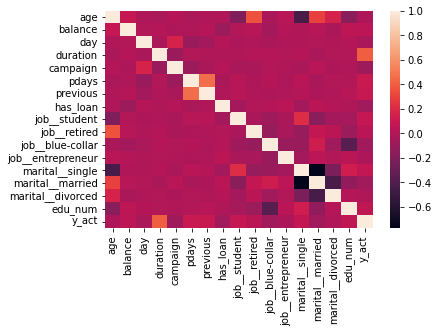

In [ ]:
sns.heatmap(correlation_matrix)

In [ ]:
response = data.groupby(by=['housing']).agg({'id': 'count', 'y_act': 'sum'})
response

,id,y_act
housing,,
no,19507,3092
yes,24991,1841


In [ ]:
response['%'] = response['y_act']/response['id'] 
response

,id,y_act,%
housing,,,
no,19507,3092,0.158507
yes,24991,1841,0.073667


In [ ]:
data['housing_loan']=np.where(data['housing'] == 'no',1,0)

In [ ]:
data[['housing_loan','housing']].head(5)

,housing_loan,housing
0,0,yes
1,0,yes
2,0,yes
3,0,yes
4,1,no


In [ ]:
correlation_matrix= data[['age', 'balance', 'day','duration', 'campaign', 'pdays','previous','has_loan','job__student',
                          'job__retired','job__blue-collar','job__entrepreneur','marital__single','marital__married','marital__divorced','edu_num','housing_loan','y_act']].corr()
correlation_matrix

,age,balance,day,duration,campaign,pdays,previous,has_loan,job__student,job__retired,job__blue-collar,job__entrepreneur,marital__single,marital__married,marital__divorced,edu_num,housing_loan,y_act
age,1.000000,0.086883,-0.007054,-0.022424,0.013197,-0.032865,-0.009281,0.000393,-0.205969,0.361474,-0.026768,0.030161,-0.436651,0.296463,0.163740,-0.158918,0.156257,-0.012960
balance,0.086883,1.000000,0.005326,0.018333,-0.013113,0.000583,0.013786,-0.083863,0.002118,0.028050,-0.047403,0.010557,-0.010682,0.024610,-0.022757,0.055903,0.065393,0.046196
day,-0.007054,0.005326,1.000000,-0.031805,0.163436,-0.093831,-0.051876,0.011425,-0.016609,-0.007147,-0.022938,-0.002764,-0.007952,0.007822,-0.000754,0.021778,0.028650,-0.030488
duration,-0.022424,0.018333,-0.031805,1.000000,-0.091798,0.001599,0.001063,-0.009830,-0.004922,0.019181,0.014202,0.002313,0.022054,-0.023695,0.005177,0.002302,-0.010460,0.401144
campaign,0.013197,-0.013113,0.163436,-0.091798,1.000000,-0.088420,-0.032357,0.009071,-0.022060,-0.024519,0.008025,0.001375,-0.024533,0.032281,-0.014890,-0.000931,0.026089,-0.071687
pdays,-0.032865,0.000583,-0.093831,0.001599,-0.088420,1.000000,0.454325,-0.021917,0.025103,-0.014925,0.020989,-0.014271,0.029473,-0.028239,0.001635,0.008379,-0.127848,0.104953
previous,-0.009281,0.013786,-0.051876,0.001063,-0.032357,0.454325,1.000000,-0.009496,0.024348,-0.005761,-0.015577,-0.009268,0.018486,-0.014612,-0.003754,0.028250,-0.041331,0.092384
has_loan,0.000393,-0.083863,0.011425,-0.009830,0.009071,-0.021917,-0.009496,1.000000,-0.059335,0.003229,0.015800,0.039344,-0.054427,0.038530,0.017978,0.001072,-0.036872,-0.065575
job__student,-0.205969,0.002118,-0.016609,-0.004922,-0.022060,0.025103,0.024348,-0.059335,1.000000,-0.030280,-0.077278,-0.027193,0.210963,-0.162399,-0.049558,-0.042017,0.087508,0.081522
job__retired,0.361474,0.028050,-0.007147,0.019181,-0.024519,-0.014925,-0.005761,0.003229,-0.030280,1.000000,-0.109022,-0.038363,-0.106542,0.071531,0.041193,-0.085505,0.123577,0.040772


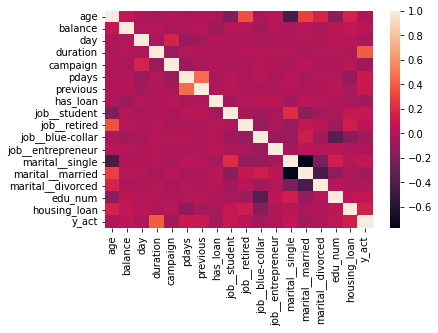

In [ ]:
sns.heatmap(correlation_matrix)

In [ ]:
response = data.groupby(by=['poutcome']).agg({'id': 'count', 'y_act': 'sum'})
response

,id,y_act
poutcome,,
failure,4818,583
other,1797,293
success,1424,915
unknown,36459,3142


In [ ]:
response['%'] = response['y_act']/response['id'] 
response

,id,y_act,%
poutcome,,,
failure,4818,583,0.121005
other,1797,293,0.163050
success,1424,915,0.642556
unknown,36459,3142,0.086179


In [ ]:
data['poutcome_num'] = data['poutcome']
data['poutcome_num'].replace('failure', 3, inplace=True)
data['poutcome_num'].replace('other', 2, inplace=True)
data['poutcome_num'].replace('success', 1, inplace=True)
data['poutcome_num'].replace('unknown', 4, inplace=True)

data.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,...,job__technician,job__unemployed,job__unknown,marital_grp,marital__divorced,marital__married,marital__single,edu_num,housing_loan,poutcome_num
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,...,0,0,0,married,0,1,0,3,0,4
1,2,44,technician,single,secondary,no,29,yes,no,unknown,...,1,0,0,single,0,0,1,2,0,4
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,...,0,0,0,married,0,1,0,2,0,4
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,...,0,0,0,married,0,1,0,0,0,4
4,5,33,unknown,single,unknown,no,1,no,no,unknown,...,0,0,1,single,0,0,1,0,1,4


In [ ]:
correlation_matrix= data[['age', 'balance', 'day','duration', 'campaign', 'pdays','previous','has_loan','job__student',
                          'job__retired','job__blue-collar','job__entrepreneur','marital__single','marital__married','marital__divorced',
                          'edu_num','housing_loan','poutcome_num','y_act']].corr()
correlation_matrix

,age,balance,day,duration,campaign,pdays,previous,has_loan,job__student,job__retired,job__blue-collar,job__entrepreneur,marital__single,marital__married,marital__divorced,edu_num,housing_loan,poutcome_num,y_act
age,1.000000,0.086883,-0.007054,-0.022424,0.013197,-0.032865,-0.009281,0.000393,-0.205969,0.361474,-0.026768,0.030161,-0.436651,0.296463,0.163740,-0.158918,0.156257,0.015174,-0.012960
balance,0.086883,1.000000,0.005326,0.018333,-0.013113,0.000583,0.013786,-0.083863,0.002118,0.028050,-0.047403,0.010557,-0.010682,0.024610,-0.022757,0.055903,0.065393,-0.030631,0.046196
day,-0.007054,0.005326,1.000000,-0.031805,0.163436,-0.093831,-0.051876,0.011425,-0.016609,-0.007147,-0.022938,-0.002764,-0.007952,0.007822,-0.000754,0.021778,0.028650,0.074125,-0.030488
duration,-0.022424,0.018333,-0.031805,1.000000,-0.091798,0.001599,0.001063,-0.009830,-0.004922,0.019181,0.014202,0.002313,0.022054,-0.023695,0.005177,0.002302,-0.010460,-0.026653,0.401144
campaign,0.013197,-0.013113,0.163436,-0.091798,1.000000,-0.088420,-0.032357,0.009071,-0.022060,-0.024519,0.008025,0.001375,-0.024533,0.032281,-0.014890,-0.000931,0.026089,0.094305,-0.071687
pdays,-0.032865,0.000583,-0.093831,0.001599,-0.088420,1.000000,0.454325,-0.021917,0.025103,-0.014925,0.020989,-0.014271,0.029473,-0.028239,0.001635,0.008379,-0.127848,-0.711105,0.104953
previous,-0.009281,0.013786,-0.051876,0.001063,-0.032357,0.454325,1.000000,-0.009496,0.024348,-0.005761,-0.015577,-0.009268,0.018486,-0.014612,-0.003754,0.028250,-0.041331,-0.483997,0.092384
has_loan,0.000393,-0.083863,0.011425,-0.009830,0.009071,-0.021917,-0.009496,1.000000,-0.059335,0.003229,0.015800,0.039344,-0.054427,0.038530,0.017978,0.001072,-0.036872,0.044876,-0.065575
job__student,-0.205969,0.002118,-0.016609,-0.004922,-0.022060,0.025103,0.024348,-0.059335,1.000000,-0.030280,-0.077278,-0.027193,0.210963,-0.162399,-0.049558,-0.042017,0.087508,-0.062073,0.081522
job__retired,0.361474,0.028050,-0.007147,0.019181,-0.024519,-0.014925,-0.005761,0.003229,-0.030280,1.000000,-0.109022,-0.038363,-0.106542,0.071531,0.041193,-0.085505,0.123577,-0.010077,0.040772


In [ ]:
X_variables = ['age', 'balance', 'day','duration', 'campaign', 'pdays','previous','has_loan','job__student',
                          'job__retired','job__blue-collar','job__entrepreneur','marital__single','marital__married','marital__divorced',
                          'edu_num','housing_loan','poutcome_num']

y_varibale = 'y_act'

X = data[X_variables]

print(X.head())
print('\n')
print(X.describe())

   age  balance  day  duration  campaign  pdays  previous  has_loan  \
0   58     2143    5       261         1     -1         0         0   
1   44       29    5       151         1     -1         0         0   
2   33        2    5        76         1     -1         0         1   
3   47     1506    5        92         1     -1         0         0   
4   33        1    5       198         1     -1         0         0   

   job__student  job__retired  job__blue-collar  job__entrepreneur  \
0             0             0                 0                  0   
1             0             0                 0                  0   
2             0             0                 0                  1   
3             0             0                 1                  0   
4             0             0                 0                  0   

   marital__single  marital__married  marital__divorced  edu_num  \
0                0                 1                  0        3   
1               

In [ ]:
correlation_matrix= data[['age', 'balance', 'day','duration', 'campaign', 'pdays','previous','has_loan','job__student',
                          'job__retired','job__blue-collar','job__entrepreneur','marital__single','marital__married','marital__divorced',
                          'edu_num','housing_loan','poutcome_num','y_act']].corr()
correlation_matrix

,age,balance,day,duration,campaign,pdays,previous,has_loan,job__student,job__retired,job__blue-collar,job__entrepreneur,marital__single,marital__married,marital__divorced,edu_num,housing_loan,poutcome_num,y_act
age,1.000000,0.086883,-0.007054,-0.022424,0.013197,-0.032865,-0.009281,0.000393,-0.205969,0.361474,-0.026768,0.030161,-0.436651,0.296463,0.163740,-0.158918,0.156257,0.015174,-0.012960
balance,0.086883,1.000000,0.005326,0.018333,-0.013113,0.000583,0.013786,-0.083863,0.002118,0.028050,-0.047403,0.010557,-0.010682,0.024610,-0.022757,0.055903,0.065393,-0.030631,0.046196
day,-0.007054,0.005326,1.000000,-0.031805,0.163436,-0.093831,-0.051876,0.011425,-0.016609,-0.007147,-0.022938,-0.002764,-0.007952,0.007822,-0.000754,0.021778,0.028650,0.074125,-0.030488
duration,-0.022424,0.018333,-0.031805,1.000000,-0.091798,0.001599,0.001063,-0.009830,-0.004922,0.019181,0.014202,0.002313,0.022054,-0.023695,0.005177,0.002302,-0.010460,-0.026653,0.401144
campaign,0.013197,-0.013113,0.163436,-0.091798,1.000000,-0.088420,-0.032357,0.009071,-0.022060,-0.024519,0.008025,0.001375,-0.024533,0.032281,-0.014890,-0.000931,0.026089,0.094305,-0.071687
pdays,-0.032865,0.000583,-0.093831,0.001599,-0.088420,1.000000,0.454325,-0.021917,0.025103,-0.014925,0.020989,-0.014271,0.029473,-0.028239,0.001635,0.008379,-0.127848,-0.711105,0.104953
previous,-0.009281,0.013786,-0.051876,0.001063,-0.032357,0.454325,1.000000,-0.009496,0.024348,-0.005761,-0.015577,-0.009268,0.018486,-0.014612,-0.003754,0.028250,-0.041331,-0.483997,0.092384
has_loan,0.000393,-0.083863,0.011425,-0.009830,0.009071,-0.021917,-0.009496,1.000000,-0.059335,0.003229,0.015800,0.039344,-0.054427,0.038530,0.017978,0.001072,-0.036872,0.044876,-0.065575
job__student,-0.205969,0.002118,-0.016609,-0.004922,-0.022060,0.025103,0.024348,-0.059335,1.000000,-0.030280,-0.077278,-0.027193,0.210963,-0.162399,-0.049558,-0.042017,0.087508,-0.062073,0.081522
job__retired,0.361474,0.028050,-0.007147,0.019181,-0.024519,-0.014925,-0.005761,0.003229,-0.030280,1.000000,-0.109022,-0.038363,-0.106542,0.071531,0.041193,-0.085505,0.123577,-0.010077,0.040772


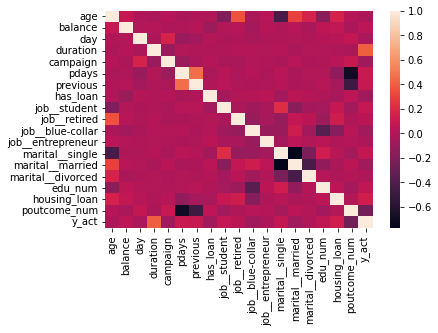

In [ ]:
sns.heatmap(correlation_matrix)

In [ ]:
X_variables = ['age', 'balance', 'day','duration', 'campaign', 'pdays','previous','has_loan','job__student',
                          'job__retired','job__blue-collar','job__entrepreneur','marital__single','marital__married','marital__divorced',
                          'edu_num','housing_loan','poutcome_num',]
data[X_variables].head()

,age,balance,day,duration,campaign,pdays,previous,has_loan,job__student,job__retired,job__blue-collar,job__entrepreneur,marital__single,marital__married,marital__divorced,edu_num,housing_loan,poutcome_num
0,58,2143,5,261,1,-1,0,0,0,0,0,0,0,1,0,3,0,4
1,44,29,5,151,1,-1,0,0,0,0,0,0,1,0,0,2,0,4
2,33,2,5,76,1,-1,0,1,0,0,0,1,0,1,0,2,0,4
3,47,1506,5,92,1,-1,0,0,0,0,1,0,0,1,0,0,0,4
4,33,1,5,198,1,-1,0,0,0,0,0,0,1,0,0,0,1,4


In [ ]:
y_varibale = 'y_act'
data[y_varibale].head()

0    0
1    0
2    0
3    0
4    0
Name: y_act, dtype: int64

In [ ]:
pd.crosstab(data[y_varibale], data['y'])

y,no,yes
y_act,,
0,39565,0
1,0,4933


In [ ]:
X = data[X_variables]
X

,age,balance,day,duration,campaign,pdays,previous,has_loan,job__student,job__retired,job__blue-collar,job__entrepreneur,marital__single,marital__married,marital__divorced,edu_num,housing_loan,poutcome_num
0,58,2143,5,261,1,-1,0,0,0,0,0,0,0,1,0,3,0,4
1,44,29,5,151,1,-1,0,0,0,0,0,0,1,0,0,2,0,4
2,33,2,5,76,1,-1,0,1,0,0,0,1,0,1,0,2,0,4
3,47,1506,5,92,1,-1,0,0,0,0,1,0,0,1,0,0,0,4
4,33,1,5,198,1,-1,0,0,0,0,0,0,1,0,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,113,17,266,1,-1,0,0,1,0,0,0,1,0,0,3,1,4
45205,25,505,17,386,2,-1,0,1,0,0,0,0,1,0,0,2,1,4
45206,51,825,17,977,3,-1,0,0,0,0,0,0,0,1,0,3,1,4
45209,57,668,17,508,4,-1,0,0,0,0,1,0,0,1,0,2,1,4


In [ ]:
y = data[y_varibale]
y

0        0
1        0
2        0
3        0
4        0
        ..
45203    1
45205    1
45206    1
45209    0
45210    0
Name: y_act, Length: 44498, dtype: int64

# Data Pre-processing Function

In [ ]:
def pre_processing(data):    
    data['id'] = data.index+1

    data['has_loan']=np.where(data['loan'] == 'no',0,1)
    data['housing_loan']=np.where(data['housing'] == 'no',1,0)
    data['job_grp'] = data['job']
    data = data.join(pd.get_dummies(data['job_grp'], prefix='job_'))
    data['marital_grp'] = data['marital']
    data = data.join(pd.get_dummies(data['marital_grp'], prefix='marital_'))

    data['edu_num'] = data['education']
    data['edu_num'].replace('primary', 1, inplace=True)
    data['edu_num'].replace('secondary', 2, inplace=True)
    data['edu_num'].replace('tertiary', 3, inplace=True)
    data['edu_num'].replace('unknown', 0, inplace=True)

    data['poutcome_num'] = data['poutcome']
    data['poutcome_num'].replace('failure', 3, inplace=True)
    data['poutcome_num'].replace('other', 2, inplace=True)
    data['poutcome_num'].replace('success', 1, inplace=True)
    data['poutcome_num'].replace('unknown', 4, inplace=True)

       
  
    # Select Columns
    X_variables = ['age', 'balance', 'day','duration', 'campaign', 'pdays','previous','has_loan','job__student',
                          'job__retired','job__blue-collar','job__entrepreneur','marital__single','marital__married','marital__divorced',
                          'edu_num','housing_loan','poutcome_num']
    
    # Assign 0 to missing columns
    for x in list(set(X_variables) - set(data.columns)):
        data[x] = 0
        
    return data[X_variables]

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(F"Train sample size = {len(X_train)}")
print(F"Test sample size  = {len(X_test)}")

Train sample size = 31148
Test sample size  = 13350


In [ ]:
def model_train(model, model_name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})

    accuracy = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
    precision = metrics.precision_score(test_result['y_act'], test_result['y_pred'], average='binary', pos_label=1)
    f1_score = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
    roc_auc = metrics.roc_auc_score(test_result['y_act'], test_result['y_pred_prob'])

    return ({'model_name':model_name, 
                   'model':model, 
                   'accuracy':accuracy, 
                   'precision':precision,
                  'f1_score':f1_score,
                  'roc_auc':roc_auc,
                  })

In [ ]:
model0 = model_train(RandomForestClassifier(n_estimators=500, max_depth=10, n_jobs=3, verbose=1), 'rf_new', X_train, y_train, X_test, y_test)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.6s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    2.7s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    6.1s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    6.9s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.5s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.5s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.5s finished


In [ ]:
model0

{'model_name': 'rf_new',
 'model': RandomForestClassifier(max_depth=10, n_estimators=500, n_jobs=3, verbose=1),
 'accuracy': 0.907191011235955,
 'precision': 0.6916376306620209,
 'f1_score': 0.8886552291613521,
 'roc_auc': 0.8939596352959073}

# 
Fitting Multipe Models with Different Hyperparamaters

## [A] Manualy explore hyperparameter space

In [ ]:
models = []
models.append(model_train(LogisticRegression(n_jobs=3, verbose=1), 'lgr1', X_train, y_train, X_test, y_test))
models.append(model_train(RandomForestClassifier(n_estimators=100, max_depth=None, n_jobs=3, verbose=1), 'rf1', X_train, y_train, X_test, y_test))
models.append(model_train(RandomForestClassifier(n_estimators=500, max_depth=None, n_jobs=3, verbose=1), 'rf2', X_train, y_train, X_test, y_test))
models.append(model_train(RandomForestClassifier(n_estimators=500, max_depth=10, n_jobs=3, verbose=1), 'rf3', X_train, y_train, X_test, y_test))
models.append(model_train(RandomForestClassifier(n_estimators=500, max_depth=20, n_jobs=3, verbose=1), 'rf4', X_train, y_train, X_test, y_test))
models = pd.DataFrame(models)
models

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:    1.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    1.2s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    3.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    1.7s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    7.0s
[Parallel(n_jobs=3)]

,model_name,model,accuracy,precision,f1_score,roc_auc
0,lgr1,"LogisticRegression(n_jobs=3, verbose=1)",0.899925,0.623246,0.877333,0.856740
1,rf1,"(DecisionTreeClassifier(max_features='auto', r...",0.905169,0.611303,0.894252,0.885948
2,rf2,"(DecisionTreeClassifier(max_features='auto', r...",0.905768,0.616725,0.894779,0.889564
3,rf3,"(DecisionTreeClassifier(max_depth=10, max_feat...",0.906667,0.682676,0.888305,0.893755
4,rf4,"(DecisionTreeClassifier(max_depth=20, max_feat...",0.906667,0.625442,0.895500,0.892820


## [B] Use of Grid Search


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [100,500], 'max_depth': [None, 10, 20]}
gs_model = GridSearchCV(RandomForestClassifier(), parameters, n_jobs=2, verbose=3, pre_dispatch=2)
gs_model.fit(X_train, y_train)  

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [100, 500]},
             pre_dispatch=2, verbose=3)

In [ ]:
print(gs_model.best_params_) 

{'max_depth': 10, 'n_estimators': 100}


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix 

y_pred = gs_model.predict(X_test) 

print(classification_report(y_test, y_pred)) 
print(confusion_matrix(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     11891
           1       0.70      0.28      0.40      1459

    accuracy                           0.91     13350
   macro avg       0.81      0.63      0.67     13350
weighted avg       0.89      0.91      0.89     13350

[[11713   178]
 [ 1052   407]]


# Select Best Model

In [ ]:
# Select best model 
model = models.query("model_name=='rf4'")
model 

,model_name,model,accuracy,precision,f1_score,roc_auc
4,rf4,"(DecisionTreeClassifier(max_depth=20, max_feat...",0.906667,0.625442,0.8955,0.89282


In [ ]:
model = model['model'].values[0]
model

RandomForestClassifier(max_depth=20, n_estimators=500, n_jobs=3, verbose=1)

# Saving Best Model

## [A] Use Pickle

In [ ]:
import pickle

save_file = 'model_rf3_test.pickle'
pickle.dump(model, open(save_file, 'wb'))

In [ ]:
# loading from file
model_ = pickle.load(open(save_file, 'rb'))
model_

RandomForestClassifier(max_depth=20, n_estimators=500, n_jobs=3, verbose=1)

## [B] Use Joblib (supports parallelization)

In [ ]:
import joblib

save_file = 'model_rf3_bank.joblib'
joblib.dump(model, open(save_file, 'wb'))

In [ ]:
# loading from file
model_ = joblib.load(save_file)
model_

RandomForestClassifier(max_depth=20, n_estimators=500, n_jobs=3, verbose=1)

In [ ]:
sample_input = data[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y']].sample(10)
sample_input

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
794,46,self-employed,married,tertiary,no,2303,yes,no,unknown,7,may,241,1,-1,0,unknown,no
36200,44,services,divorced,secondary,no,0,yes,no,cellular,11,may,151,2,370,2,failure,no
20953,48,housemaid,married,primary,no,469,no,no,cellular,14,aug,103,2,-1,0,unknown,no
20354,59,technician,married,secondary,no,478,no,no,cellular,11,aug,108,5,-1,0,unknown,no
17486,56,management,divorced,tertiary,no,-59,no,yes,cellular,28,jul,127,6,-1,0,unknown,no
20842,34,management,single,tertiary,no,9827,yes,no,cellular,13,aug,871,4,-1,0,unknown,yes
7742,27,blue-collar,married,secondary,no,1341,yes,yes,unknown,30,may,254,2,-1,0,unknown,no
35709,36,admin.,single,secondary,no,506,yes,no,cellular,8,may,208,4,-1,0,unknown,no
25909,38,blue-collar,married,primary,no,190,yes,no,telephone,19,nov,623,1,175,1,other,yes
44726,38,admin.,married,secondary,no,0,yes,no,cellular,8,sep,210,1,92,3,success,yes


In [ ]:
pre_processing(sample_input)

,age,balance,day,duration,campaign,pdays,previous,has_loan,job__student,job__retired,job__blue-collar,job__entrepreneur,marital__single,marital__married,marital__divorced,edu_num,housing_loan,poutcome_num
794,46,2303,7,241,1,-1,0,0,0,0,0,0,0,1,0,3,0,4
36200,44,0,11,151,2,370,2,0,0,0,0,0,0,0,1,2,0,3
20953,48,469,14,103,2,-1,0,0,0,0,0,0,0,1,0,1,1,4
20354,59,478,11,108,5,-1,0,0,0,0,0,0,0,1,0,2,1,4
17486,56,-59,28,127,6,-1,0,1,0,0,0,0,0,0,1,3,1,4
20842,34,9827,13,871,4,-1,0,0,0,0,0,0,1,0,0,3,0,4
7742,27,1341,30,254,2,-1,0,1,0,0,1,0,0,1,0,2,0,4
35709,36,506,8,208,4,-1,0,0,0,0,0,0,1,0,0,2,0,4
25909,38,190,19,623,1,175,1,0,0,0,1,0,0,1,0,1,0,2
44726,38,0,8,210,1,92,3,0,0,0,0,0,0,1,0,2,0,1


In [ ]:
model.predict_proba(pre_processing(sample_input))

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.1s finished


array([[0.98328886, 0.01671114],
       [0.99886348, 0.00113652],
       [0.99691971, 0.00308029],
       [0.99619457, 0.00380543],
       [0.99790009, 0.00209991],
       [0.15990952, 0.84009048],
       [0.99124937, 0.00875063],
       [0.99737548, 0.00262452],
       [0.2931811 , 0.7068189 ],
       [0.21812843, 0.78187157]])

# Score Function

In [ ]:
def score(input_data, model):
    return model.predict_proba(input_data)

In [ ]:
prediction = score(input_data=pre_processing(sample_input), model=model)
prediction

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.1s finished


array([[0.91562037, 0.08437963],
       [0.64137695, 0.35862305],
       [0.97342216, 0.02657784],
       [0.96383836, 0.03616164],
       [0.97501806, 0.02498194],
       [0.98381063, 0.01618937],
       [0.79320395, 0.20679605],
       [0.65354556, 0.34645444],
       [0.61688039, 0.38311961],
       [0.86520831, 0.13479169]])

# Post-processing Function for Prediction

In [ ]:
def post_processing(prediction):
    if len(prediction)==1:
        return prediction[:, 1][0]
    else:
        return prediction[:, 1]

In [ ]:
output = post_processing(score(input_data=pre_processing(sample_input), model=model))
output

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.1s finished


array([0.08437963, 0.35862305, 0.02657784, 0.03616164, 0.02498194,
       0.01618937, 0.20679605, 0.34645444, 0.38311961, 0.13479169])

In [ ]:
# Create new column in input dataset
sample_input['prediction'] = post_processing(model.predict_proba(pre_processing(sample_input)))
sample_input

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.1s finished


,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,id,has_loan,housing_loan,job_grp,prediction
20573,54,technician,married,secondary,no,658,no,no,cellular,12,...,4,-1,0,unknown,no,20574,0,1,technician,0.084380
35485,50,blue-collar,married,primary,no,162,yes,no,cellular,7,...,3,-1,0,unknown,no,35486,0,0,blue-collar,0.358623
8882,29,admin.,divorced,secondary,no,201,yes,no,unknown,4,...,3,-1,0,unknown,no,8883,0,0,admin.,0.026578
6276,31,blue-collar,married,secondary,no,66,no,no,unknown,27,...,1,-1,0,unknown,no,6277,0,1,blue-collar,0.036162
36672,37,housemaid,married,tertiary,no,166,yes,no,cellular,12,...,1,-1,0,unknown,no,36673,0,0,housemaid,0.024982
19584,31,technician,married,secondary,no,-556,yes,no,cellular,7,...,2,-1,0,unknown,no,19585,0,0,technician,0.016189
6228,41,self-employed,married,primary,no,-8,yes,no,unknown,27,...,2,-1,0,unknown,no,6229,0,0,self-employed,0.206796
43812,37,management,married,tertiary,no,1967,yes,no,cellular,27,...,1,-1,0,unknown,no,43813,0,0,management,0.346454
6651,31,blue-collar,married,primary,no,-454,yes,yes,unknown,28,...,2,-1,0,unknown,no,6652,1,0,blue-collar,0.383120
44573,25,services,single,secondary,no,199,no,no,cellular,16,...,2,95,3,other,no,44574,0,1,services,0.134792


In [ ]:
sample_input[['y','prediction']]

,y,prediction
20573,no,0.084380
35485,no,0.358623
8882,no,0.026578
6276,no,0.036162
36672,no,0.024982
19584,no,0.016189
6228,no,0.206796
43812,no,0.346454
6651,no,0.383120
44573,no,0.134792


# Prediction Function for Application (Inference Pipeline)

In [ ]:
def app_prediction_function(input_data, model):
    return post_processing(score(input_data=pre_processing(input_data), model=model))

In [ ]:
input_data = data[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y']].sample(1)
print(input_data.transpose())
app_prediction_function(input_data, model)

               35844
age               54
job          retired
marital     divorced
education  secondary
default           no
balance         1483
housing          yes
loan             yes
contact     cellular
day                8
month            may
duration          53
campaign           2
pdays             -1
previous           0
poutcome     unknown
y                 no


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.1s finished


0.022644809945255105

In [ ]:
input_data = input_data.to_dict(orient='records')[0]
input_data

{'age': 54,
 'job': 'retired',
 'marital': 'divorced',
 'education': 'secondary',
 'default': 'no',
 'balance': 1483,
 'housing': 'yes',
 'loan': 'yes',
 'contact': 'cellular',
 'day': 8,
 'month': 'may',
 'duration': 53,
 'campaign': 2,
 'pdays': -1,
 'previous': 0,
 'poutcome': 'unknown',
 'y': 'no',
 'id': 35845,
 'has_loan': 1,
 'housing_loan': 0,
 'job_grp': 'retired'}

In [ ]:
input_data = pd.DataFrame([input_data])
input_data

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,id,has_loan,housing_loan,job_grp
0,54,retired,divorced,secondary,no,1483,yes,yes,cellular,8,...,53,2,-1,0,unknown,no,35845,1,0,retired


In [ ]:
app_prediction_function(input_data, model)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.1s finished


0.022644809945255105

# Feature Importance

In [ ]:
feature_importances = model.feature_importances_
feature_importances

array([0.06942814, 0.06046567, 0.04517907, 0.43061284, 0.02353049,
       0.07592417, 0.03501786, 0.00870498, 0.00766465, 0.00361883,
       0.00707967, 0.00300652, 0.0073008 , 0.00777311, 0.00397867,
       0.01701503, 0.03989914, 0.15380036])

In [ ]:
X_test.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'has_loan', 'job__student', 'job__retired', 'job__blue-collar',
       'job__entrepreneur', 'marital__single', 'marital__married',
       'marital__divorced', 'edu_num', 'housing_loan', 'poutcome_num'],
      dtype='object')

In [ ]:
features = X_test.columns
features

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'has_loan', 'job__student', 'job__retired', 'job__blue-collar',
       'job__entrepreneur', 'marital__single', 'marital__married',
       'marital__divorced', 'edu_num', 'housing_loan', 'poutcome_num'],
      dtype='object')

In [ ]:
feature_importance_table = pd.DataFrame(data={'features': features, 'feature_importances':feature_importances})
feature_importance_table

,features,feature_importances
0,age,0.069428
1,balance,0.060466
2,day,0.045179
3,duration,0.430613
4,campaign,0.023530
5,pdays,0.075924
6,previous,0.035018
7,has_loan,0.008705
8,job__student,0.007665
9,job__retired,0.003619


In [ ]:
feature_importance_table['feature_importances'].sum()

1.0

In [ ]:
feature_importance_table.sort_values(by='feature_importances', ascending=False)

,features,feature_importances
3,duration,0.430613
17,poutcome_num,0.153800
5,pdays,0.075924
0,age,0.069428
1,balance,0.060466
2,day,0.045179
16,housing_loan,0.039899
6,previous,0.035018
4,campaign,0.023530
15,edu_num,0.017015


In [ ]:
test_sample_features = X_test.sample()
test_sample_features

,age,balance,day,duration,campaign,pdays,previous,has_loan,job__student,job__retired,job__blue-collar,job__entrepreneur,marital__single,marital__married,marital__divorced,edu_num,housing_loan,poutcome_num
5471,35,-413,23,178,1,-1,0,0,0,0,0,0,1,0,0,2,0,4


In [ ]:
test_sample_features.values

array([[ 42, 570,  28, 344,   2,  -1,   0,   0,   0,   0,   0,   0,   0,
          1,   0,   2,   0,   4]])

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 28.1 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=776fcdfec62529f3beafa7c10788376ab4ef6aa4f0783e05fe30f9da0d753abe
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 25.4 MB/s 


In [ ]:
import lime 
from lime import lime_tabular

import shap

In [ ]:
lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['no', 'yes'],
    mode='classification'
)


lime_exp = lime_explainer.explain_instance(
    data_row=test_sample_features.values[0],
    predict_fn=model.predict_proba)
lime_exp.show_in_notebook(show_table=True)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.5s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.6s finished


# Explain with SHAP (SHapley Additive exPlanations)

In [ ]:
explainer = shap.TreeExplainer(model)

In [ ]:
[explainer.expected_value[0], explainer.expected_value[1]]

[0.8884176833183505, 0.11158231668164893]

In [ ]:
shap_values = explainer(X_train)
shap_values

.values =
array([[[ 0.00273573, -0.00273573],
        [-0.01510886,  0.01510886],
        [-0.00692027,  0.00692027],
        ...,
        [-0.01407509,  0.01407509],
        [-0.03341952,  0.03341952],
        [ 0.01320886, -0.01320886]],

       [[ 0.00395959, -0.00395959],
        [ 0.00544495, -0.00544495],
        [ 0.00137305, -0.00137305],
        ...,
        [ 0.00281091, -0.00281091],
        [ 0.01537117, -0.01537117],
        [ 0.01048085, -0.01048085]],

       [[ 0.00396521, -0.00396521],
        [ 0.00831847, -0.00831847],
        [ 0.00082054, -0.00082054],
        ...,
        [ 0.00247673, -0.00247673],
        [ 0.01046902, -0.01046902],
        [ 0.00817515, -0.00817515]],

       ...,

       [[-0.00300585,  0.00300585],
        [ 0.02172899, -0.02172899],
        [-0.01035844,  0.01035844],
        ...,
        [-0.00810362,  0.00810362],
        [-0.01667319,  0.01667319],
        [ 0.00922818, -0.00922818]],

       [[-0.00349312,  0.00349312],
        [-0.00042

In [ ]:
X_train.head()

,age,balance,day,duration,campaign,pdays,previous,has_loan,job__student,job__retired,job__blue-collar,job__entrepreneur,marital__single,marital__married,marital__divorced,edu_num,housing_loan,poutcome_num
28866,30,1454,30,276,3,-1,0,0,0,0,0,0,0,1,0,3,1,4
13310,34,123,8,218,3,-1,0,0,0,0,1,0,0,1,0,2,0,4
1232,42,0,8,66,2,-1,0,0,0,0,0,0,0,1,0,2,0,4
38511,26,46,15,17,3,351,6,0,0,0,0,0,1,0,0,2,0,2
43968,36,538,23,339,1,183,5,0,0,0,0,0,1,0,0,3,1,1


In [ ]:
shap.getjs()
shap.initjs()

In [ ]:
shap_values[0].values

array([[ 0.00273573, -0.00273573],
       [-0.01510886,  0.01510886],
       [-0.00692027,  0.00692027],
       [ 0.00335195, -0.00335195],
       [ 0.01157967, -0.01157967],
       [ 0.01145772, -0.01145772],
       [ 0.01263612, -0.01263612],
       [-0.00340388,  0.00340388],
       [ 0.00153569, -0.00153569],
       [ 0.00045882, -0.00045882],
       [-0.00264057,  0.00264057],
       [-0.00011447,  0.00011447],
       [ 0.00501322, -0.00501322],
       [ 0.00379307, -0.00379307],
       [ 0.00010254, -0.00010254],
       [-0.01407509,  0.01407509],
       [-0.03341952,  0.03341952],
       [ 0.01320886, -0.01320886]])

In [ ]:
shap_values.values[:,:, 0]

array([[ 0.00273573, -0.01510886, -0.00692027, ..., -0.01407509,
        -0.03341952,  0.01320886],
       [ 0.00395959,  0.00544495,  0.00137305, ...,  0.00281091,
         0.01537117,  0.01048085],
       [ 0.00396521,  0.00831847,  0.00082054, ...,  0.00247673,
         0.01046902,  0.00817515],
       ...,
       [-0.00300585,  0.02172899, -0.01035844, ..., -0.00810362,
        -0.01667319,  0.00922818],
       [-0.00349312, -0.00042097, -0.00191444, ...,  0.00366208,
        -0.04884495, -0.28185579],
       [ 0.00667928,  0.00407322,  0.00167977, ...,  0.00195305,
         0.0177063 ,  0.01033654]])

In [ ]:
shap_values.values[:,:, 0][0]

array([ 0.00273573, -0.01510886, -0.00692027,  0.00335195,  0.01157967,
        0.01145772,  0.01263612, -0.00340388,  0.00153569,  0.00045882,
       -0.00264057, -0.00011447,  0.00501322,  0.00379307,  0.00010254,
       -0.01407509, -0.03341952,  0.01320886])

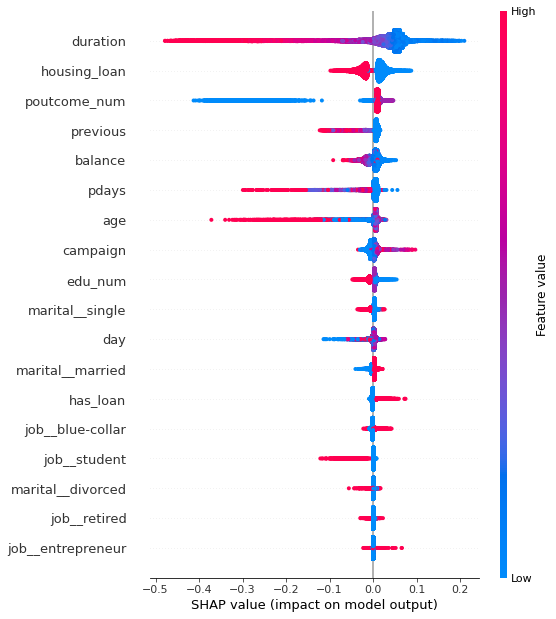

In [ ]:
shap.summary_plot(shap_values.values[:,:, 0], X_train)

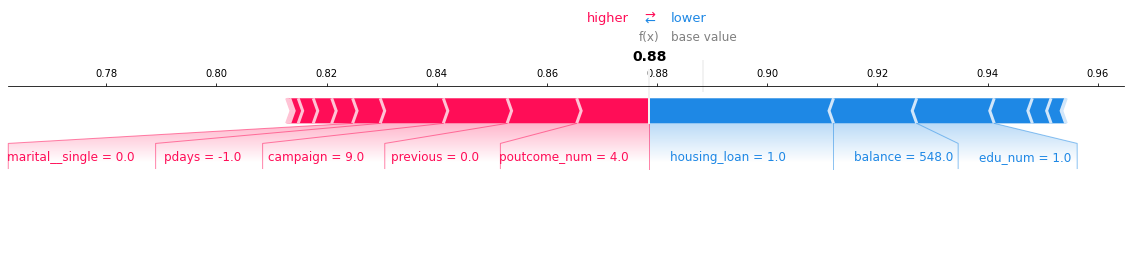

In [ ]:
shap.force_plot(explainer.expected_value[0], shap_values.values[:,:, 0][0], X_test.head(1), matplotlib = True)

In [ ]:
shap_values = explainer(test_sample_features)
shap_values

.values =
array([[[ 5.89865786e-03, -5.89865786e-03],
        [ 3.81440290e-03, -3.81440290e-03],
        [-1.22844463e-04,  1.22844463e-04],
        [ 9.99990839e-03, -9.99990839e-03],
        [ 2.46392124e-03, -2.46392124e-03],
        [ 6.98009067e-03, -6.98009067e-03],
        [ 1.12447872e-02, -1.12447872e-02],
        [-1.27192642e-03,  1.27192642e-03],
        [ 1.09734511e-03, -1.09734511e-03],
        [ 1.33791005e-04, -1.33791005e-04],
        [-2.08978289e-03,  2.08978289e-03],
        [-3.17198974e-05,  3.17198974e-05],
        [ 2.93260661e-03, -2.93260661e-03],
        [ 2.71793613e-03, -2.71793613e-03],
        [ 1.67660257e-04, -1.67660257e-04],
        [ 3.75354251e-03, -3.75354251e-03],
        [ 2.17005651e-02, -2.17005651e-02],
        [ 1.16731871e-02, -1.16731871e-02]]])

.base_values =
array([[0.88841768, 0.11158232]])

.data =
array([[ 42, 570,  28, 344,   2,  -1,   0,   0,   0,   0,   0,   0,   0,
          1,   0,   2,   0,   4]])

In [ ]:
shap_values.values[:,:, 0][0]

array([ 5.89865786e-03,  3.81440290e-03, -1.22844463e-04,  9.99990839e-03,
        2.46392124e-03,  6.98009067e-03,  1.12447872e-02, -1.27192642e-03,
        1.09734511e-03,  1.33791005e-04, -2.08978289e-03, -3.17198974e-05,
        2.93260661e-03,  2.71793613e-03,  1.67660257e-04,  3.75354251e-03,
        2.17005651e-02,  1.16731871e-02])

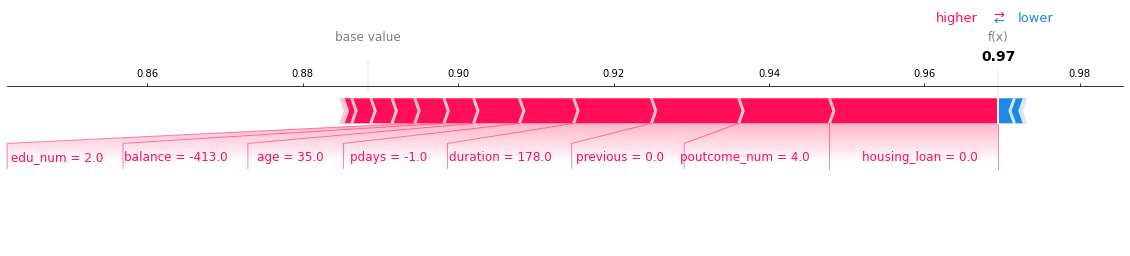

In [ ]:
shap.force_plot(explainer.expected_value[0], shap_values.values[:,:, 0][0], test_sample_features, matplotlib = True)